In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from xgboost import XGBRegressor


🧪 [외부 테스트셋 평가 성능]
MAE : 2.91
MSE : 14.7
R²  : 0.2719


C:\Users\Playdata\AppData\Local\Temp\ipykernel_12384\2558157972.py:45: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\Playdata\miniconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


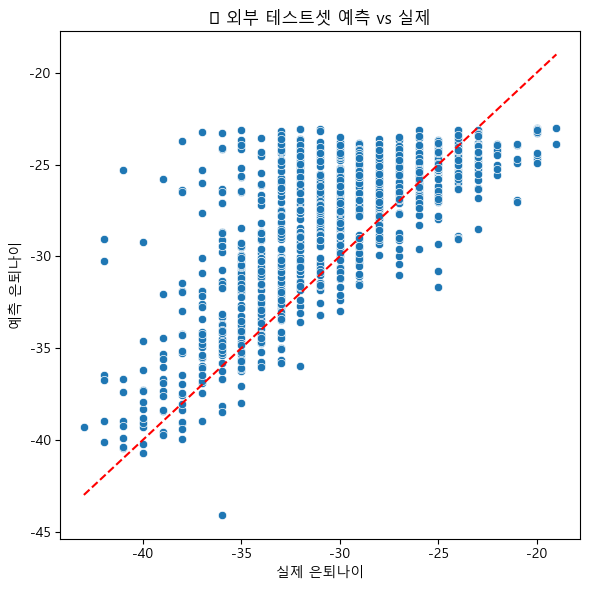


🔍 오차 큰 선수 TOP 10
      실제 은퇴나이  예측 은퇴나이  오차(년)
475       -41   -25.30 -15.70
320       -38   -23.73 -14.27
480       -37   -23.25 -13.75
1060      -39   -25.77 -13.23
1024      -42   -29.08 -12.92
321       -36   -23.28 -12.72
638       -36   -24.11 -11.89
366       -35   -23.13 -11.87
546       -36   -24.14 -11.86
1104      -42   -30.27 -11.73


In [27]:

# 1. 훈련 데이터(mlb data) 불러오기
train_df = pd.read_csv(r"C:\Documents\SKN13_mingyu\project_2\data\mlb_retired_total.csv", encoding='cp949')

# ✅ 은퇴나이 계산: birth_year - retire_year
train_df['은퇴_나이'] = train_df['birth_year'] - train_df['retire_year']

# 2. 훈련 데이터 피처, 타깃 분리
target_col = '은퇴_나이'
X_train = train_df.drop(columns=[target_col, '선수명'], errors='ignore')
y_train = train_df[target_col]
X_train = pd.get_dummies(X_train)

# 3. 테스트 데이터(kbo data) 불러오기 및 동일 처리
test_df = pd.read_csv(r"C:\Documents\SKN13_mingyu\project_2\data\kbo_retired_total.csv", encoding='utf-8')
test_df['은퇴_나이'] = test_df['birth_year'] - test_df['retire_year']

y_test = test_df[target_col]
X_test = test_df.drop(columns=[target_col, '선수명'], errors='ignore')
X_test = pd.get_dummies(X_test)

# ✅ 컬럼 정렬 맞추기
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 4. 모델 학습 및 예측
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 5. 성능 평가
print("\n🧪 [외부 테스트셋 평가 성능]")
print("MAE :", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE :", round(mean_squared_error(y_test, y_pred), 2))
print("R²  :", round(r2_score(y_test, y_pred), 4))

# 6. 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 은퇴나이')
plt.ylabel('예측 은퇴나이')
plt.title('🎯 외부 테스트셋 예측 vs 실제')
plt.tight_layout()
plt.show()

# 7. 예측 결과 정리
result_df = pd.DataFrame({
    '실제 은퇴나이': y_test.values,
    '예측 은퇴나이': y_pred,
    '오차(년)': y_test.values - y_pred
})

print("\n🔍 오차 큰 선수 TOP 10")
print(result_df.sort_values(by='오차(년)', key=abs, ascending=False).head(10))

In [28]:
mlb_df = pd.read_csv(r"C:\Documents\SKN13_mingyu\project_2\data\mlb_retired_total.csv", encoding='ISO-8859-1')
kbo_df = pd.read_csv(r"C:\Documents\SKN13_mingyu\project_2\data\kbo_retired_total.csv", encoding='utf-8')

mlb_df.shape, kbo_df.shape

((9535, 19), (1139, 19))

In [29]:
# mlb train data에 kbo의 30%를 더해서 dataset 설정

kbo_df_30 = kbo_df.sample(frac=0.3, random_state=42)
kbo_df_70 = kbo_df.drop(kbo_df_30.index)

mlb_kbo_df = pd.concat([mlb_df, kbo_df_30], ignore_index=True)

mlb_kbo_df.shape, kbo_df_70.shape

((9877, 19), (797, 19))


🧪 [외부 테스트셋 평가 성능]
MAE : 2.49
MSE : 11.02
R²  : 0.4635


C:\Users\Playdata\AppData\Local\Temp\ipykernel_12384\2183687105.py:51: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\Playdata\miniconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


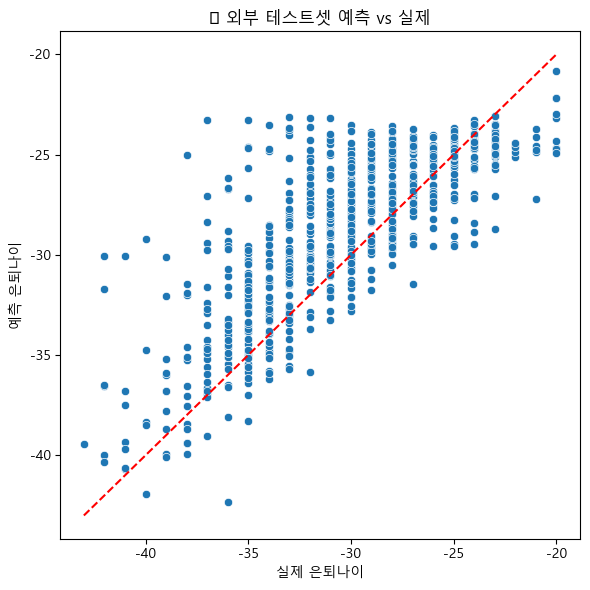


🔍 오차 큰 선수 TOP 10
     실제 은퇴나이  예측 은퇴나이  오차(년)
324      -37   -23.27 -13.73
222      -38   -25.04 -12.96
710      -42   -30.04 -11.96
249      -35   -23.26 -11.74
322      -41   -30.04 -10.96
453      -40   -29.23 -10.77
712      -34   -23.53 -10.47
368      -35   -24.62 -10.38
747      -35   -24.65 -10.35
770      -42   -31.68 -10.32


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

# 1. 훈련 데이터(mlb + kbo30%) 불러오기
train_df = mlb_kbo_df

# ✅ 은퇴나이 계산: birth_year - retire_year
train_df['은퇴_나이'] = train_df['birth_year'] - train_df['retire_year']

# 2. 훈련 데이터 피처, 타깃 분리
target_col = '은퇴_나이'
X_train = train_df.drop(columns=[target_col, '선수명'], errors='ignore')
y_train = train_df[target_col]
X_train = pd.get_dummies(X_train)

# 3. 테스트 데이터(kbo 70%) 불러오기 및 동일 처리
test_df = kbo_df_70
test_df['은퇴_나이'] = test_df['birth_year'] - test_df['retire_year']

y_test = test_df[target_col]
X_test = test_df.drop(columns=[target_col, '선수명'], errors='ignore')
X_test = pd.get_dummies(X_test)

# ✅ 컬럼 정렬 맞추기
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 4. 모델 학습 및 예측
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 5. 성능 평가
print("\n🧪 [외부 테스트셋 평가 성능]")
print("MAE :", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE :", round(mean_squared_error(y_test, y_pred), 2))
print("R²  :", round(r2_score(y_test, y_pred), 4))

# 6. 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 은퇴나이')
plt.ylabel('예측 은퇴나이')
plt.title('🎯 외부 테스트셋 예측 vs 실제')
plt.tight_layout()
plt.show()

# 7. 예측 결과 정리
result_df = pd.DataFrame({
    '실제 은퇴나이': y_test.values,
    '예측 은퇴나이': y_pred,
    '오차(년)': y_test.values - y_pred
})

print("\n🔍 오차 큰 선수 TOP 10")
print(result_df.sort_values(by='오차(년)', key=abs, ascending=False).head(10))


🧪 [외부 테스트셋 평가 성능]
MAE : 2.36
MSE : 9.5
R²  : 0.5297


C:\Users\Playdata\AppData\Local\Temp\ipykernel_12384\814296581.py:45: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\Playdata\miniconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


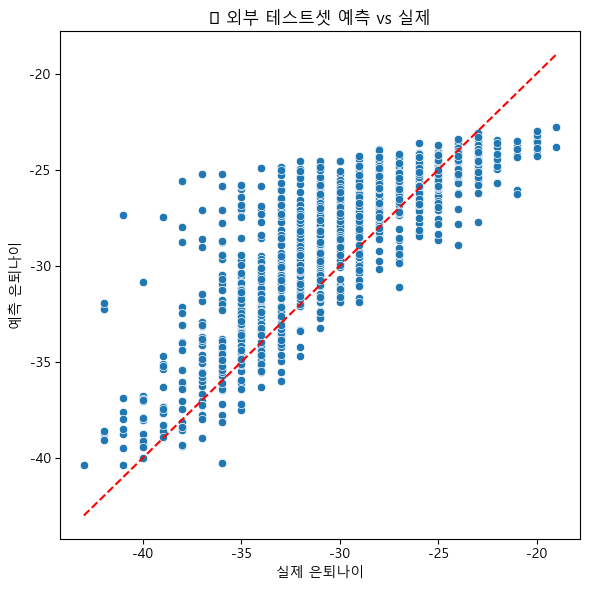


🔍 오차 큰 선수 TOP 10
      실제 은퇴나이    예측 은퇴나이      오차(년)
475       -41 -27.385031 -13.614969
320       -38 -25.596807 -12.403193
480       -37 -25.205273 -11.794727
1060      -39 -27.458250 -11.541750
321       -36 -25.215992 -10.784008
638       -36 -25.861958 -10.138042
1104      -42 -31.965488 -10.034512
1052      -38 -27.969116 -10.030884
360       -37 -27.077042  -9.922958
1024      -42 -32.254128  -9.745872


In [31]:
# 1. 훈련 데이터 불러오기
train_df = pd.read_csv(r"C:\Documents\SKN13_mingyu\project_2\data\mlb_retired_total.csv", encoding='cp949')

# ✅ 은퇴나이 계산: birth_year - retire_year
train_df['은퇴_나이'] = train_df['birth_year'] - train_df['retire_year']

# 2. 훈련 데이터 피처, 타깃 분리
target_col = '은퇴_나이'
X_train = train_df.drop(columns=[target_col, '선수명'], errors='ignore')
y_train = train_df[target_col]
X_train = pd.get_dummies(X_train)

# 3. 테스트 데이터 불러오기 및 동일 처리
test_df = pd.read_csv(r"C:\Documents\SKN13_mingyu\project_2\data\kbo_retired_total.csv", encoding='utf-8')
test_df['은퇴_나이'] = test_df['birth_year'] - test_df['retire_year']

y_test = test_df[target_col]
X_test = test_df.drop(columns=[target_col, '선수명'], errors='ignore')
X_test = pd.get_dummies(X_test)

# ✅ 컬럼 정렬 맞추기
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 4. 모델 학습 및 예측
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 5. 성능 평가
print("\n🧪 [외부 테스트셋 평가 성능]")
print("MAE :", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE :", round(mean_squared_error(y_test, y_pred), 2))
print("R²  :", round(r2_score(y_test, y_pred), 4))

# 6. 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 은퇴나이')
plt.ylabel('예측 은퇴나이')
plt.title('🎯 외부 테스트셋 예측 vs 실제')
plt.tight_layout()
plt.show()

# 7. 예측 결과 정리
result_df = pd.DataFrame({
    '실제 은퇴나이': y_test.values,
    '예측 은퇴나이': y_pred,
    '오차(년)': y_test.values - y_pred
})

print("\n🔍 오차 큰 선수 TOP 10")
print(result_df.sort_values(by='오차(년)', key=abs, ascending=False).head(10))


🧪 [외부 테스트셋 평가 성능]
MAE : 1.52
MSE : 4.18
R²  : 0.7965


C:\Users\Playdata\AppData\Local\Temp\ipykernel_12384\999794991.py:45: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\Playdata\miniconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


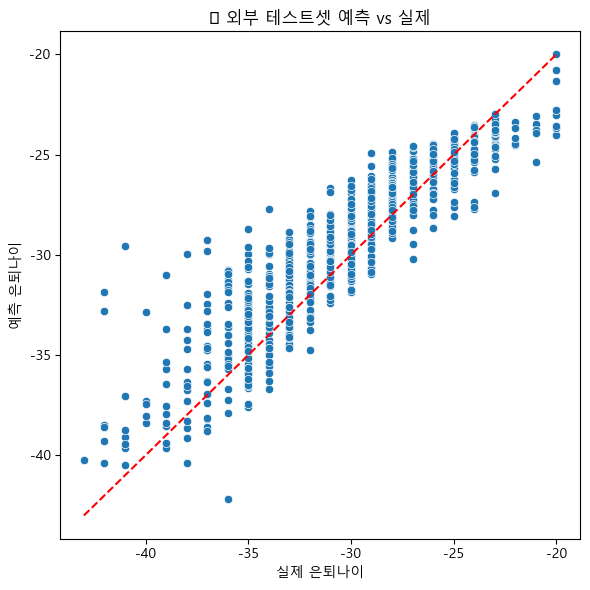


🔍 오차 큰 선수 TOP 10
     실제 은퇴나이    예측 은퇴나이      오차(년)
322      -41 -29.558144 -11.441856
770      -42 -31.846142 -10.153858
710      -42 -32.820000  -9.180000
222      -38 -29.942112  -8.057888
738      -39 -31.022058  -7.977942
324      -37 -29.261425  -7.738575
245      -37 -29.821693  -7.178307
453      -40 -32.868210  -7.131790
712      -34 -27.697933  -6.302067
249      -35 -28.731598  -6.268402


In [32]:
# 1. 훈련 데이터 불러오기
train_df = mlb_kbo_df

# ✅ 은퇴나이 계산: birth_year - retire_year
train_df['은퇴_나이'] = train_df['birth_year'] - train_df['retire_year']

# 2. 훈련 데이터 피처, 타깃 분리
target_col = '은퇴_나이'
X_train = train_df.drop(columns=[target_col, '선수명'], errors='ignore')
y_train = train_df[target_col]
X_train = pd.get_dummies(X_train)

# 3. 테스트 데이터 불러오기 및 동일 처리
test_df = kbo_df_70
test_df['은퇴_나이'] = test_df['birth_year'] - test_df['retire_year']

y_test = test_df[target_col]
X_test = test_df.drop(columns=[target_col, '선수명'], errors='ignore')
X_test = pd.get_dummies(X_test)

# ✅ 컬럼 정렬 맞추기
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 4. 모델 학습 및 예측
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 5. 성능 평가
print("\n🧪 [외부 테스트셋 평가 성능]")
print("MAE :", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE :", round(mean_squared_error(y_test, y_pred), 2))
print("R²  :", round(r2_score(y_test, y_pred), 4))

# 6. 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 은퇴나이')
plt.ylabel('예측 은퇴나이')
plt.title('🎯 외부 테스트셋 예측 vs 실제')
plt.tight_layout()
plt.show()

# 7. 예측 결과 정리
result_df = pd.DataFrame({
    '실제 은퇴나이': y_test.values,
    '예측 은퇴나이': y_pred,
    '오차(년)': y_test.values - y_pred
})

print("\n🔍 오차 큰 선수 TOP 10")
print(result_df.sort_values(by='오차(년)', key=abs, ascending=False).head(10))